<a href="https://colab.research.google.com/github/Paras1242/paras/blob/master/Quadratic_Model_using_tensorFLow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize']

[6.0, 4.0]

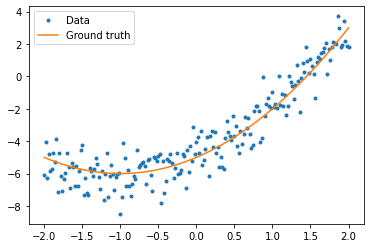

In [2]:
# Generate random data and plot it on graph

x = tf.linspace(-2,2,201)
x = tf.cast(x,tf.float32)


def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(),y.numpy(), '.',label='Data')
plt.plot(x,f(x), label = 'Ground truth')
plt.legend()

In [3]:
# create a quadratic model with randomly intialized weights and a bias

class Model(tf.Module):
  def __init__(self):
    # randomly intialize weight and bias
    rand_init = tf.random.uniform(shape=[3],minval=0.,maxval=5.,seed=22)

    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  def __call__(self,x):
    return self.w_q * (x**2) + self.w_l * x + self.b 

In [4]:
qd_model = Model() # create an instance of the model

In [5]:
def plt_pred(x,y,f,quad_model,title):
  plt.figure()
  plt.plot(x,y,'.',label='Data')
  plt.plot(x,f(x),label='Ground Truth')
  plt.plot(x,quad_model(x),label='Predicted')
  plt.title(title)
  plt.legend()

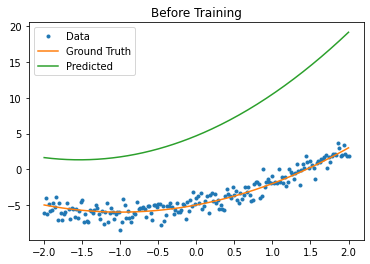

In [6]:
plt_pred(x,y,f,qd_model, 'Before Training')

In [7]:
# Define MSE loss

def Mse_loss(y_pred,y_real):
  return tf.reduce_mean(tf.square(y_pred-y_real))

In [8]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x,y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

 Mean squared error for step 0: 54.227
 Mean squared error for step 10: 9.458
 Mean squared error for step 20: 3.808
 Mean squared error for step 30: 1.852
 Mean squared error for step 40: 1.158
 Mean squared error for step 50: 0.924
 Mean squared error for step 60: 0.831
 Mean squared error for step 70: 0.803
 Mean squared error for step 80: 0.792
 Mean squared error for step 90: 0.791




Text(0.5, 1.0, 'MSE loss vs training iterations')

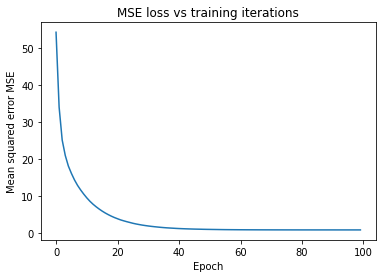

In [9]:
# set training parameters
epochs = 100
learning_rate = 0.01
losses = []

for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = Mse_loss(qd_model(x_batch),y_batch)
    #update parameter using SGD
    grad = tape.gradient(batch_loss, qd_model.variables)
    for g,v in zip(grad, qd_model.variables):
      v.assign_sub(learning_rate*g)
  loss = Mse_loss(qd_model(x),y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f" Mean squared error for step {epoch}: {loss.numpy():0.3f}")


#plot model result

print("\n")
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error MSE')
plt.title("MSE loss vs training iterations")


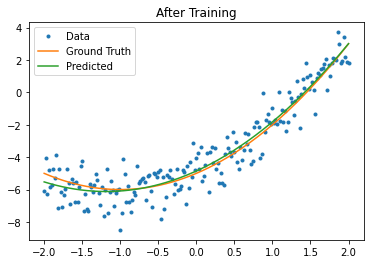

In [10]:
plt_pred(x,y,f,qd_model,'After Training')